The motivating question for this analysis is to understand the key determinants behind the success of Marvel movies within the Marvel Cinematic Universe (MCU). We aim to explore and identify factors that significantly contribute to a movie's box office performance, critical acclaim (as indicated by critics' ratings), and audience reception (as indicated by audience scores). This investigation seeks to uncover patterns and correlations within the dataset to explain the impact of various factors such as release dates, movie duration, production budgets, MCU phases, and critical versus audience responses on the overall success of these movies. Ultimately, the goal is to derive insights that shed light on the elements that drive the success of Marvel movies/content in the entertainment industry.

We collected a comprehensive dataset on Marvel movies within the MCU including information on release dates, box office earnings, critical ratings (from sources like Rotten Tomatoes and Metacritic), audience scores, production budgets, movie durations, and MCU phases. We ensured that the data consisted of relevant data, updated the earning numbers to date and added content that's coming out within the next year.

We performed data cleaning to convert date formats and prepare the data for analysis. Regression analysis was used to understand the quantitative impact of factors like release dates, production budgets, and movie durations on box office performance. Correlation analysis helped identify relationships between critical ratings, audience scores, and other variables.

Sources: 

https://www.rottentomatoes.com/

https://www.metacritic.com/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('mcu_box_office.csv')
df

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,metascore,meta_user_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94.0,91.0,79.0,86.0,126.0,186000000.0,102118668.0,318604126.0,5.851715e+08
1,The Incredible Hulk,1,6/13/2008,67.0,70.0,61.0,70.0,112.0,137500000.0,55414050.0,134806913.0,2.655739e+08
2,Iron Man 2,1,5/7/2010,72.0,71.0,57.0,64.0,124.0,170000000.0,128122480.0,312433331.0,6.211564e+08
3,Thor,1,5/6/2011,77.0,76.0,57.0,71.0,113.0,150000000.0,65723338.0,181030624.0,4.493266e+08
4,Captain America: The First Avenger,1,7/22/2011,79.0,75.0,66.0,68.0,124.0,140000000.0,65058524.0,176654505.0,3.705698e+08
5,The Avengers,1,5/4/2012,91.0,91.0,69.0,80.0,143.0,225000000.0,207438708.0,623357910.0,1.515100e+09
6,Iron Man 3,2,5/3/2013,79.0,78.0,62.0,67.0,130.0,200000000.0,174144585.0,408992272.0,1.215392e+09
7,Thor: The Dark World,2,11/8/2013,66.0,75.0,54.0,71.0,111.0,150000000.0,85737841.0,206362140.0,6.446025e+08
8,Captain America: The Winter Soldier,2,4/4/2014,90.0,92.0,70.0,83.0,135.0,170000000.0,95023721.0,259746958.0,7.144019e+08
9,Guardians of the Galaxy,2,8/1/2014,92.0,92.0,76.0,82.0,121.0,170000000.0,94320883.0,333714112.0,7.708824e+08


In [3]:
heat = df.corr()

C:\Users\godly\AppData\Local\Temp\ipykernel_11464\2347202498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = df.corr()


<Axes: >

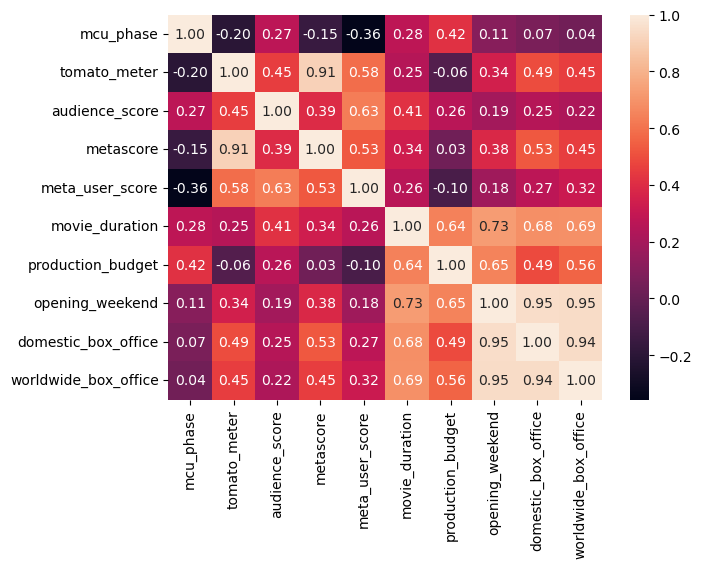

In [4]:
plt.figure(figsize=(7, 5))
sns.heatmap(heat, annot=True, fmt=".2f")

<Axes: >

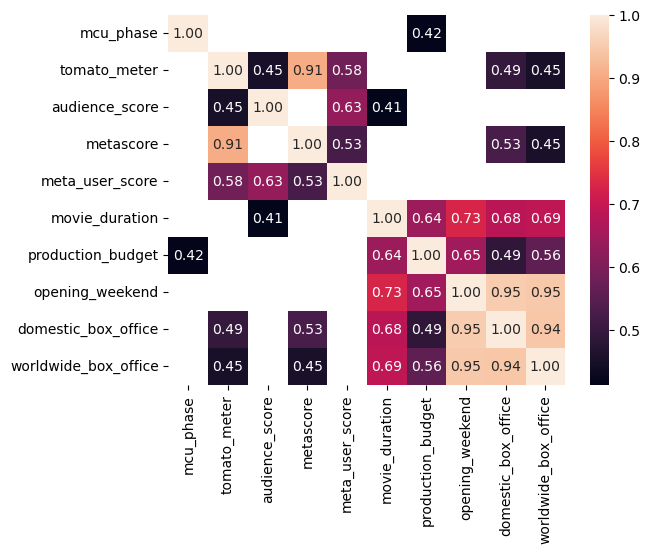

In [5]:
variable1 = heat[heat>0.4]
sns.heatmap(variable1, annot=True, fmt=".2f")

# Positive correlation between crucial variables:

Tomato Meter and Metascore with Box Office: 
There's a noteworthy positive correlation for the domestic box office, the Tomato Meter and Metascore show correlation coefficients of 0.49 and 0.53 respectively. The worldwide box office stands at 0.45. These positive correlations suggest that on average, as the critical acclaim of a movie increases based on these scores, there tends to be a corresponding rise in the movie's box office success, both domestically and globally.

Movie Duration and Audience Scores:
The movie duration shows a moderately positive correlation with audience scores (0.41). This indicates that, on average, longer movie durations tend to have slightly higher audience scores. However, the correlation is not extremely strong.

Movie Duration and Other Metrics:
Tomato Meter: This suggests that longer movies tend to receive slightly higher ratings on the Tomatometer. Metascore and Meta User Score: Similar to audience scores, movies with longer durations tend to have slightly higher Metacritic scores and user ratings.

Production Budget with Box Office Metrics:
Production budget exhibits positive correlations with opening weekend earnings, domestic box office, and worldwide box office. This implies that higher production budgets tend to correspond to higher earnings during opening weekends and in both domestic and worldwide box office totals.

In [6]:
df.dropna(subset=['tomato_meter', 'metascore', 'domestic_box_office', 'worldwide_box_office'], inplace=True)
correlation_coefficient, p_value = spearmanr(df['tomato_meter'], df['domestic_box_office'])
correlation_coefficient2, p_value2 = spearmanr(df['metascore'], df['domestic_box_office'])
correlation_coefficient3, p_value3 = spearmanr(df['tomato_meter'], df['worldwide_box_office'])
correlation_coefficient4, p_value4 = spearmanr(df['metascore'], df['worldwide_box_office'])

print(f"Spearman correlation Rotten Tomato Domestic: {correlation_coefficient}")
print(f"P-value Rotten Tomato: {p_value}")
print(f"Spearman correlation Metascore Domestic: {correlation_coefficient2}")
print(f"P-value Metascore: {p_value2}")
print(f"Spearman correlation Rotten Tomato Worldwide: {correlation_coefficient3}")
print(f"P-value Metascore: {p_value3}")
print(f"Spearman correlation Metascore Worldwide: {correlation_coefficient4}")
print(f"P-value Metascore: {p_value4}")

Spearman correlation Rotten Tomato Domestic: 0.49363979437082534
P-value Rotten Tomato: 0.003507311337164717
Spearman correlation Metascore Domestic: 0.4543176761646136
P-value Metascore: 0.007907938824548207
Spearman correlation Rotten Tomato Worldwide: 0.4911289103709737
P-value Metascore: 0.003704783840835686
Spearman correlation Metascore Worldwide: 0.4442775065256166
P-value Metascore: 0.009591881451033358


The Spearman correlation coefficient of 0.49/0.45 indicates a moderate positive monotonic relationship between the Tomato Meter/Metascores and the Domestic Box Office. Similar for the worldwide numbers. The p-value being less than 0.05 suggests that this correlation is statistically significant for all these variables. Spearman is less susceptible to outliers and is suitable for a wider range of data types and distributions.

<Axes: >

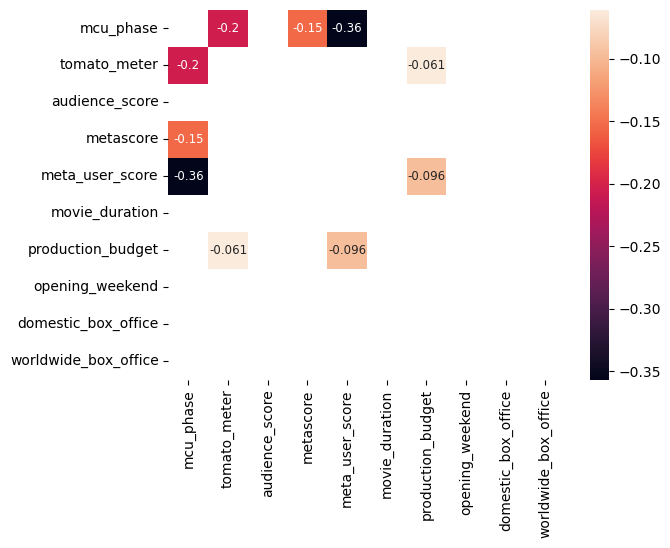

In [7]:
variable2 = heat[heat<0]
sns.heatmap(variable2, annot=True, annot_kws={"size": 8.5}) 

# Negative Correlations
Production Budget and Ratings: Even though there is a very weak negative correlation, it seems that higher Meta User Scores and Rotten Tomato ratings may have slightly lower production budgets whereas lower ratings/scores might have slightly higher budgets. This could be saying that while the box office might enjoy the higher budgets, it tends to be less acclaimed for audiences and critics alike just as a potential factor. It's very complex in reality and includes other factors such as storytelling, cast, marketing, audience expectations, etc.

MCU Phase and Meta User Score:

Negative Correlation: The Marvel Cinematic Universe (MCU) phase has a negative correlation (-0.36) with the Meta User Score. This suggests that movies in certain phases of the MCU might receive lower user scores on Metacritic.

# Examining the variables

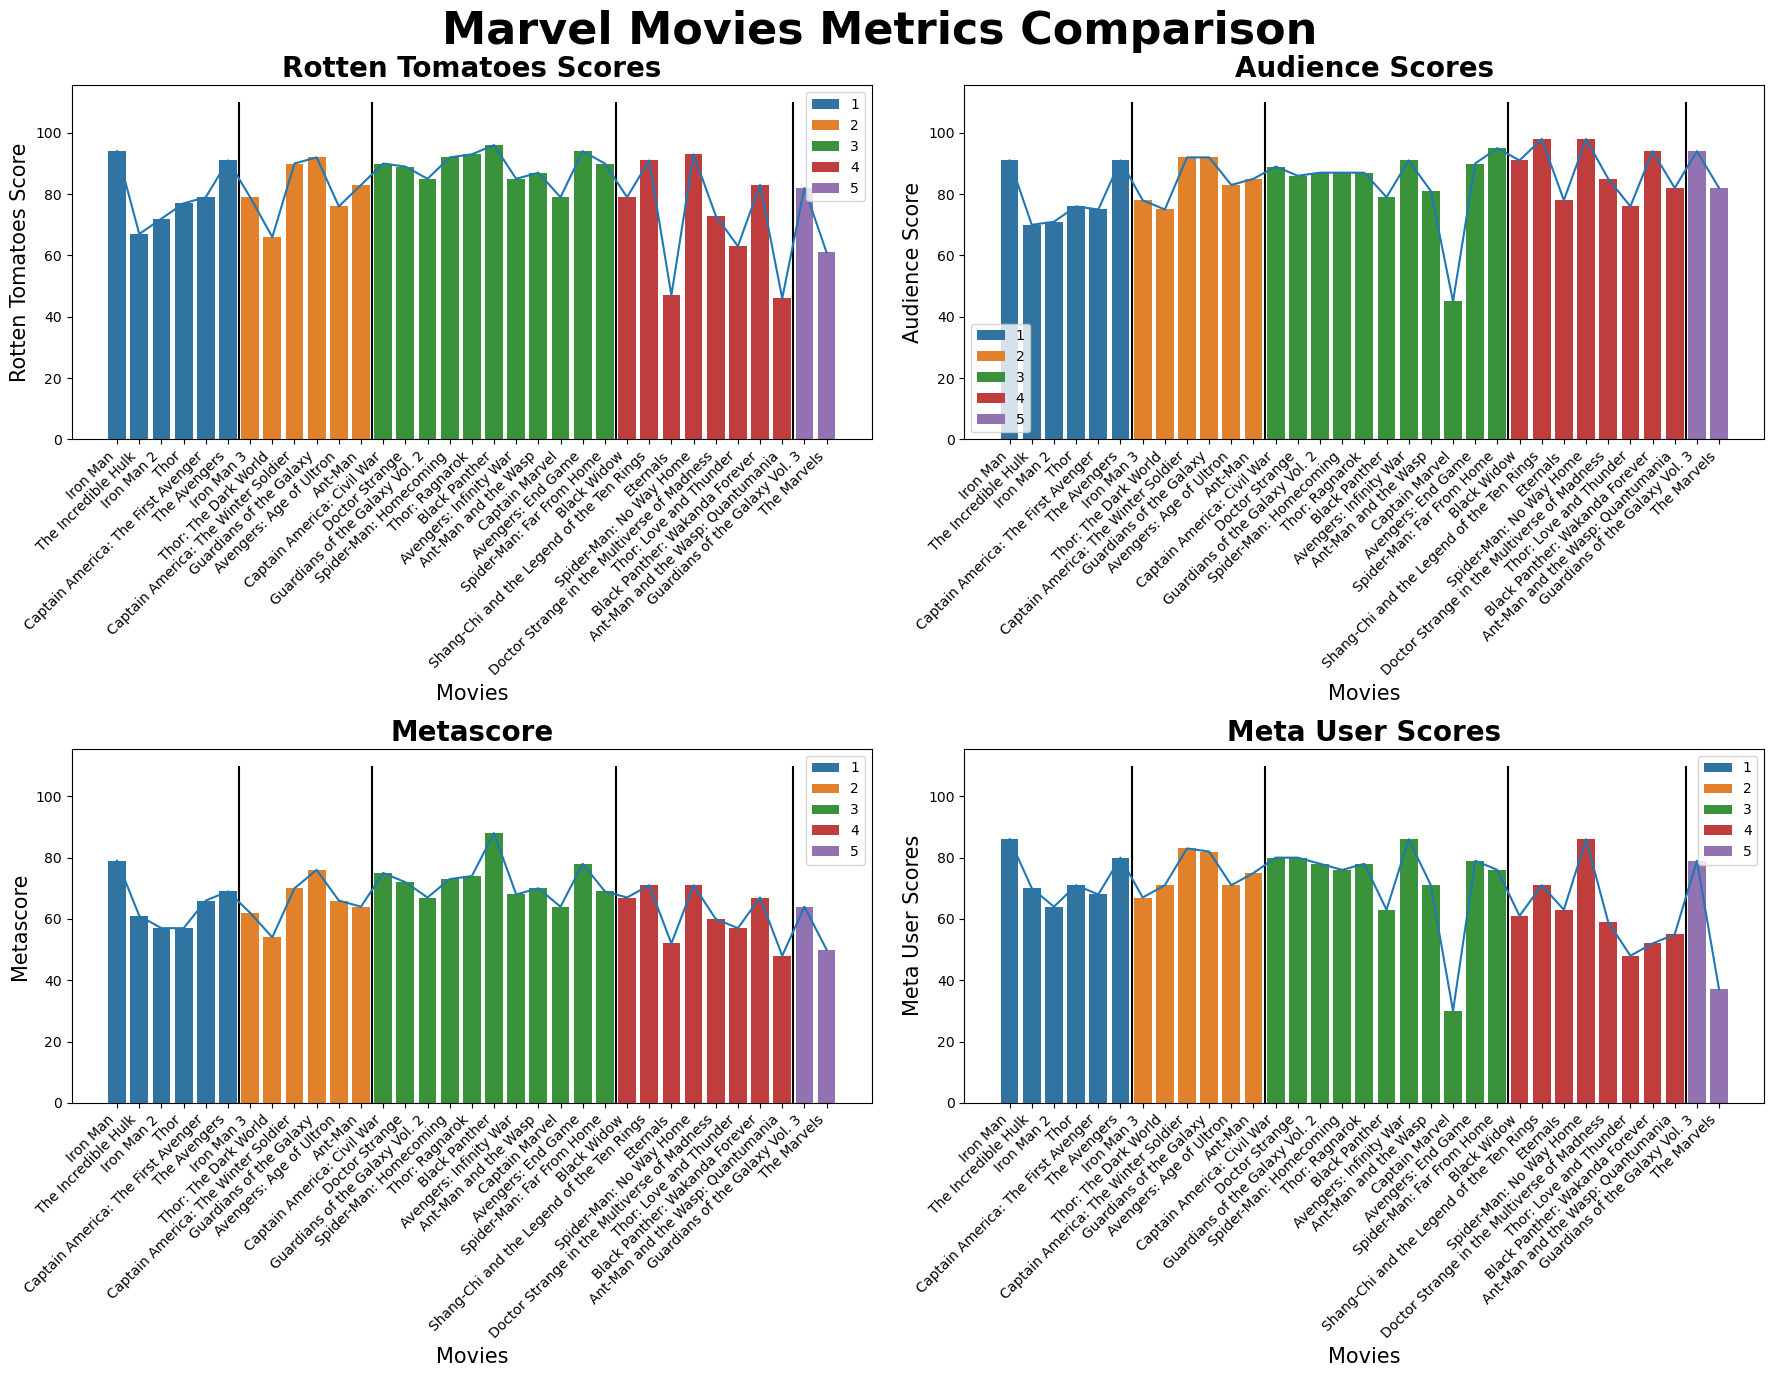

In [8]:
plt.figure(figsize=(18, 14))

plt.suptitle("Marvel Movies Metrics Comparison", fontsize=32, fontweight="bold",ha='center')

plt.subplot(2, 2, 1)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="movie_title", y="tomato_meter", data=df, hue="mcu_phase", dodge=False)
plt.title("Rotten Tomatoes Scores", fontsize=20, fontweight="bold")
plt.xlabel("Movies", fontsize=15)
plt.ylabel("Rotten Tomatoes Score", fontsize=15)
plt.vlines(x=(5.5, 11.5, 22.5, 30.5), ymin=0, ymax=110, colors = "black")
sns.lineplot(x=df.index, y="tomato_meter", data=df)

plt.subplot(2, 2, 2)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="movie_title", y="audience_score", data=df, hue="mcu_phase", dodge=False)
plt.title("Audience Scores", fontsize=20, fontweight="bold")
plt.xlabel("Movies", fontsize=15)
plt.ylabel("Audience Score", fontsize=15)
plt.vlines(x=(5.5, 11.5, 22.5, 30.5), ymin=0, ymax=110, colors = "black")
sns.lineplot(x=df.index, y="audience_score", data=df)

plt.subplot(2, 2, 3)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="movie_title", y="metascore", data=df, hue="mcu_phase", dodge=False)
plt.title("Metascore", fontsize=20, fontweight="bold")
plt.xlabel("Movies", fontsize=15)
plt.ylabel("Metascore", fontsize=15)
plt.vlines(x=(5.5, 11.5, 22.5, 30.5), ymin=0, ymax=110, colors = "black")
sns.lineplot(x=df.index, y="metascore", data=df)

plt.subplot(2, 2, 4)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="movie_title", y="meta_user_score", data=df, hue="mcu_phase", dodge=False)
plt.title("Meta User Scores", fontsize=20, fontweight="bold")
plt.xlabel("Movies", fontsize=15)
plt.ylabel("Meta User Scores", fontsize=15)
plt.vlines(x=(5.5, 11.5, 22.5, 30.5), ymin=0, ymax=110, colors = "black")
sns.lineplot(x=df.index, y="meta_user_score", data=df)

plt.tight_layout()

Examining critics and audience ratings across various phases of the MCU, a very discernible trend emerges. While Rotten Tomatoes and Metascores exhibit a general downward trajectory, the most noteworthy downtrend is observed in the Meta User Scores. This trend suggests a separation in critical and audience perspectives, with Meta User Scores experiencing a clear decline indicating audience discontentment.

In [9]:
df2 = pd.read_csv('mcu_disney_plus.csv')
df2

,show_title,mcu_phase,release_date,tomato_meter,audience_score,metascore,meta_user_score,production_budget
0,Wandavision,4,2021,91.0,88.0,77.0,68.0,225000000.0
1,The Falcon and the Winter Soldier,4,2021,85.0,82.0,74.0,57.0,150000000.0
2,Loki,4,2021,92.0,90.0,74.0,66.0,150000000.0
3,What If…?,4,2021,94.0,92.0,69.0,67.0,NaN
4,Hawkeye,4,2021,92.0,88.0,66.0,65.0,150000000.0
5,Moon Knight,4,2022,86.0,89.0,69.0,69.0,148000000.0
6,Ms. Marvel,4,2022,98.0,80.0,78.0,40.0,150000000.0
7,She-Hulk,4,2022,77.0,32.0,67.0,27.0,225000000.0
8,Secret Invasion,5,2023,53.0,47.0,63.0,35.0,212000000.0
9,Loki 2,5,2023,82.0,81.0,66.0,75.0,141000000.0


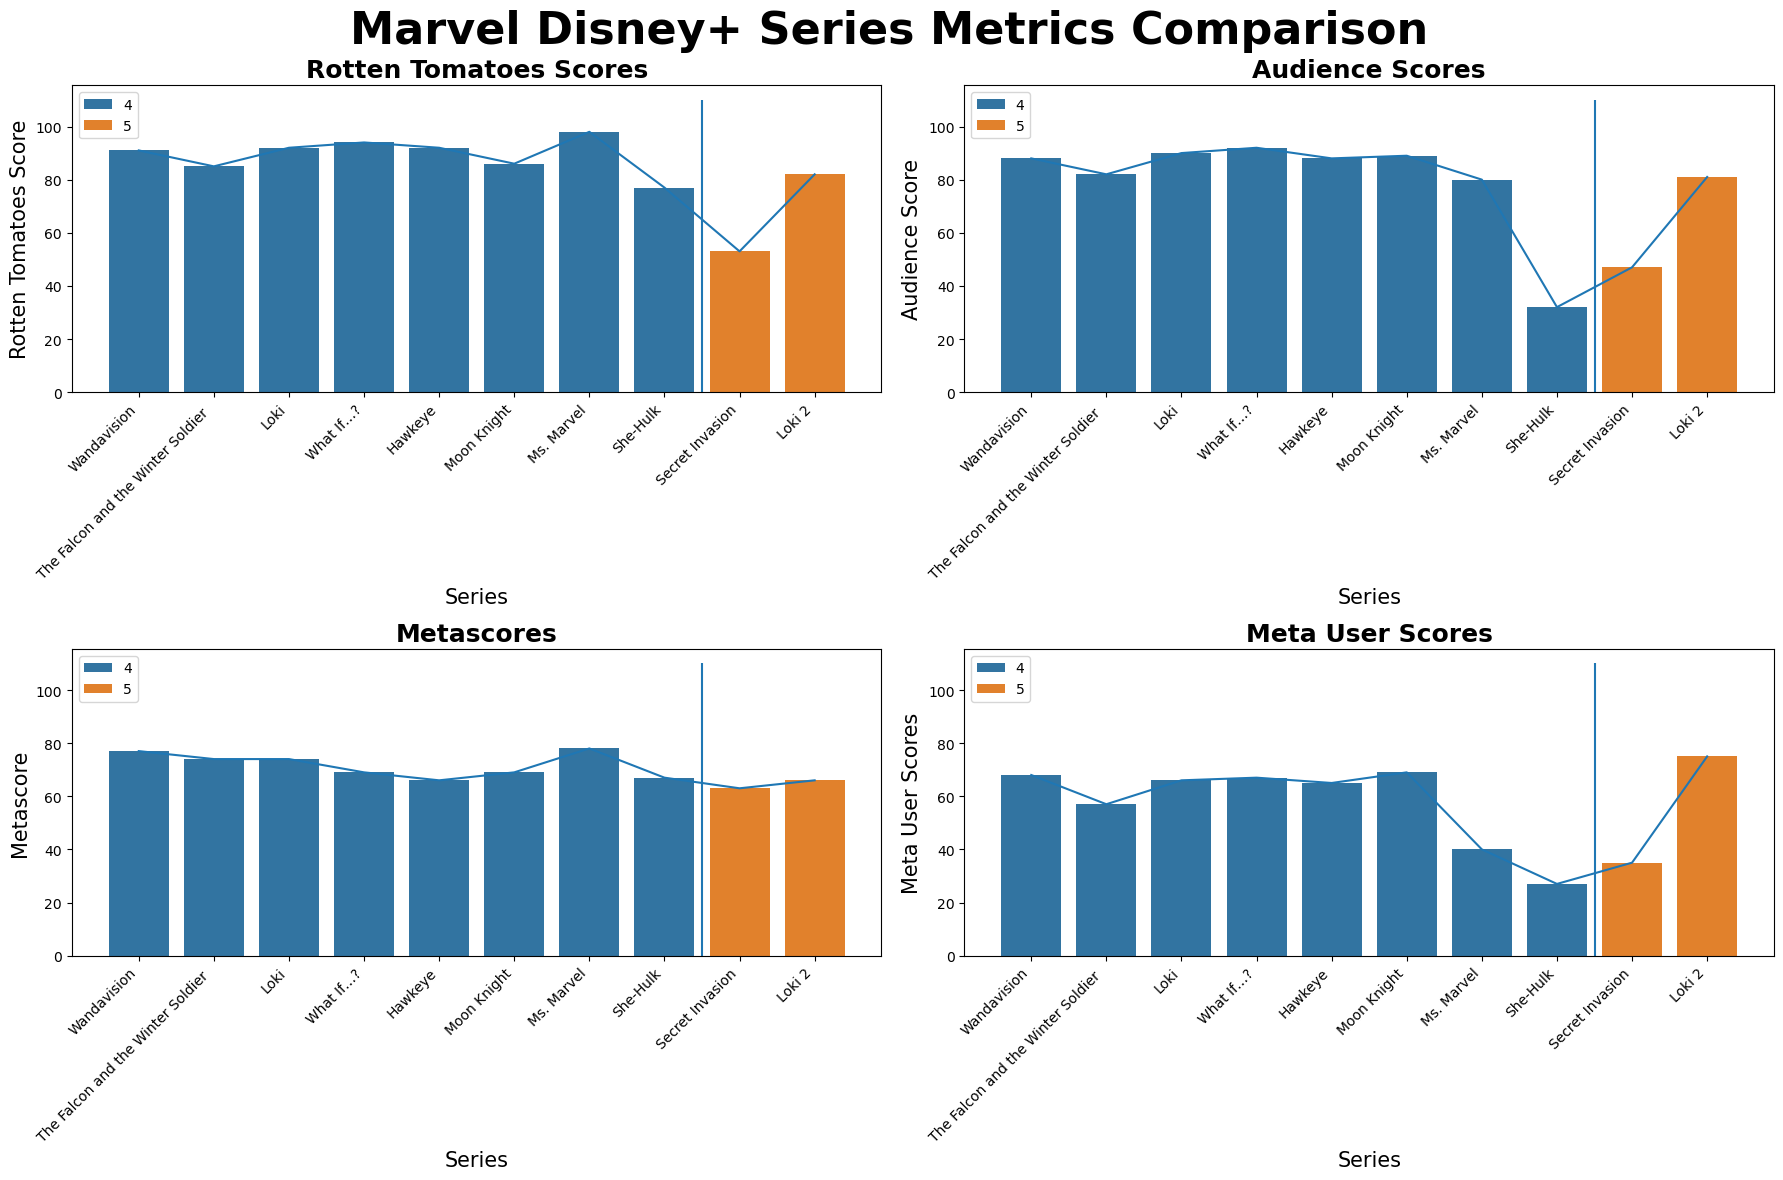

In [10]:
plt.figure(figsize=(18, 12))

plt.suptitle("Marvel Disney+ Series Metrics Comparison", fontsize=32, fontweight="bold", ha='center')

plt.subplot(2, 2, 1)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="show_title", y="tomato_meter", data=df2, hue="mcu_phase", dodge=False)
plt.title("Rotten Tomatoes Scores", fontsize=18, fontweight="bold")
plt.xlabel("Series", fontsize=15)
plt.ylabel("Rotten Tomatoes Score", fontsize=15)
plt.vlines(x=(7.5), ymin=0, ymax=110)
sns.lineplot(x=df2.index, y="tomato_meter", data=df2)

plt.subplot(2, 2, 2)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="show_title", y="audience_score", data=df2, hue="mcu_phase", dodge=False)
plt.title("Audience Scores", fontsize=18, fontweight="bold")
plt.xlabel("Series", fontsize=15)
plt.ylabel("Audience Score", fontsize=15)
plt.vlines(x=(7.5), ymin=0, ymax=110)
sns.lineplot(x=df2.index, y="audience_score", data=df2)

plt.subplot(2, 2, 3)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="show_title", y="metascore", data=df2, hue="mcu_phase", dodge=False)
plt.title("Metascores", fontsize=18, fontweight="bold")
plt.xlabel("Series", fontsize=15)
plt.ylabel("Metascore", fontsize=15)
plt.vlines(x=(7.5), ymin=0, ymax=110)
sns.lineplot(x=df2.index, y="metascore", data=df2)

plt.subplot(2, 2, 4)
plt.xticks(rotation=45, ha='right')
sns.barplot(x="show_title", y="meta_user_score", data=df2, hue="mcu_phase", dodge=False)
plt.title("Meta User Scores", fontsize=18, fontweight="bold")
plt.xlabel("Series", fontsize=15)
plt.ylabel("Meta User Scores", fontsize=15)
plt.vlines(x=(7.5), ymin=0, ymax=110)
sns.lineplot(x=df2.index, y="meta_user_score", data=df2)

plt.tight_layout()

The Disney+ series in the MCU exhibit a notable disparity between audience and critic scores once again, sparking concerns about potential impacts on storytelling coherence and quality. The series issues only fuel the fire of potential incoherent movie aspects and stories.

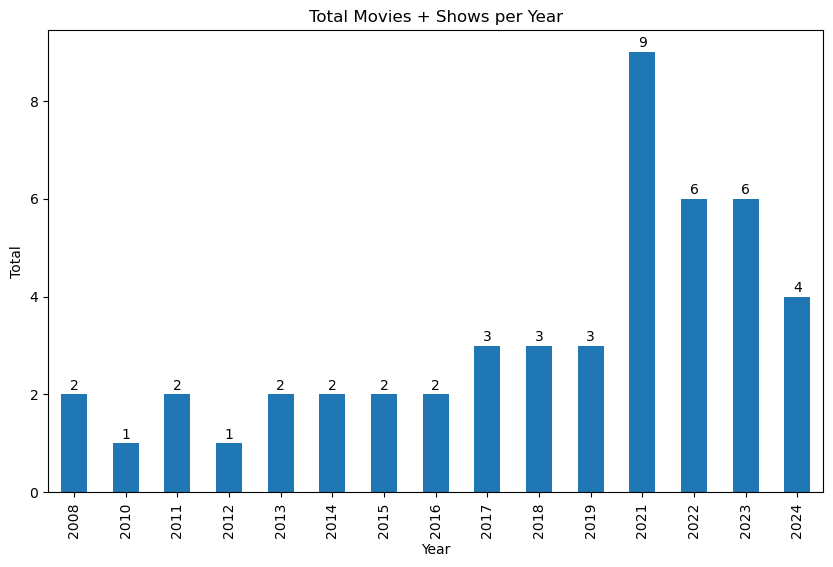

In [11]:
df['Release Year'] = pd.to_datetime(df['release_date']).dt.year
movies_by_year = df['Release Year'].value_counts().sort_index()
tv_shows_by_year = df2['release_date'].value_counts().sort_index()

total_by_year = movies_by_year.add(tv_shows_by_year, fill_value=0).astype(int)
plt.figure(figsize=(10, 6))

bars = total_by_year.plot(kind='bar')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', color='black')

plt.title('Total Movies + Shows per Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()

One of the largest factors in their commercial popularity and box office numbers is the dilution of their storylines and quality through the introduction of Disney Plus shows as well as churning out many more movies that were waiting in the pipeline caused by COVID. The MCU's expansion into TV series, particularly with the introduction of Disney+ series, has led to concerns about potential dilution of storytelling and creative focus. With an increasing number of characters and storylines to juggle, some critics argue that the sheer volume of content has made it challenging for the MCU to maintain the same level of narrative depth and character development seen in its earlier phases. Striking a delicate balance between quantity and maintaining the high standards set by its earlier movies poses an ongoing challenge for Marvel.

Average Worldwide Box Office for Phases 1-3: 980896858.2608696
Average Worldwide Box Office for Phases 4-5: 719991656.3


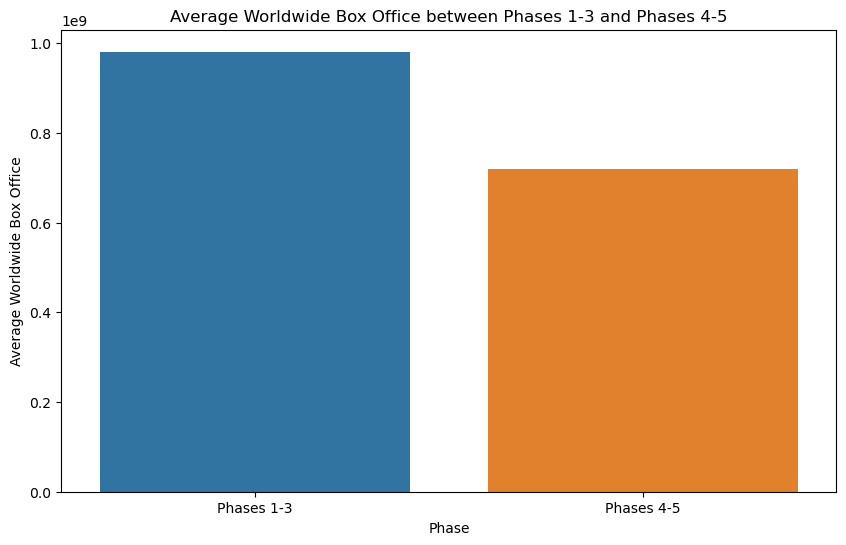

In [12]:
avg_box_phases13 = df[df['mcu_phase'].isin([1, 2, 3])]['worldwide_box_office'].mean()
avg_box_phases45 = df[df['mcu_phase'].isin([4, 5])]['worldwide_box_office'].mean()

print("Average Worldwide Box Office for Phases 1-3:", avg_box_phases13)
print("Average Worldwide Box Office for Phases 4-5:", avg_box_phases45)

comparison_df = pd.DataFrame({'Phase': ['Phases 1-3', 'Phases 4-5'], 'Average Worldwide Box Office': [avg_box_phases13, avg_box_phases45]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Phase', y='Average Worldwide Box Office', data=comparison_df)
plt.title('Average Worldwide Box Office between Phases 1-3 and Phases 4-5')
plt.show()

This substantial difference in averages suggests that, despite the inclusion of blockbuster movies in Phases 4-5, the overall performance of the movies in the global box office earnings is lower compared to the earlier phases. It's important to note that the presence of movies like "Spider-Man: No Way Home" and "Doctor Strange in the Multiverse of Madness" in Phase 4, which either crossed or came close to the billion-dollar mark, was still not sufficient enough to counterbalance the overall trend.

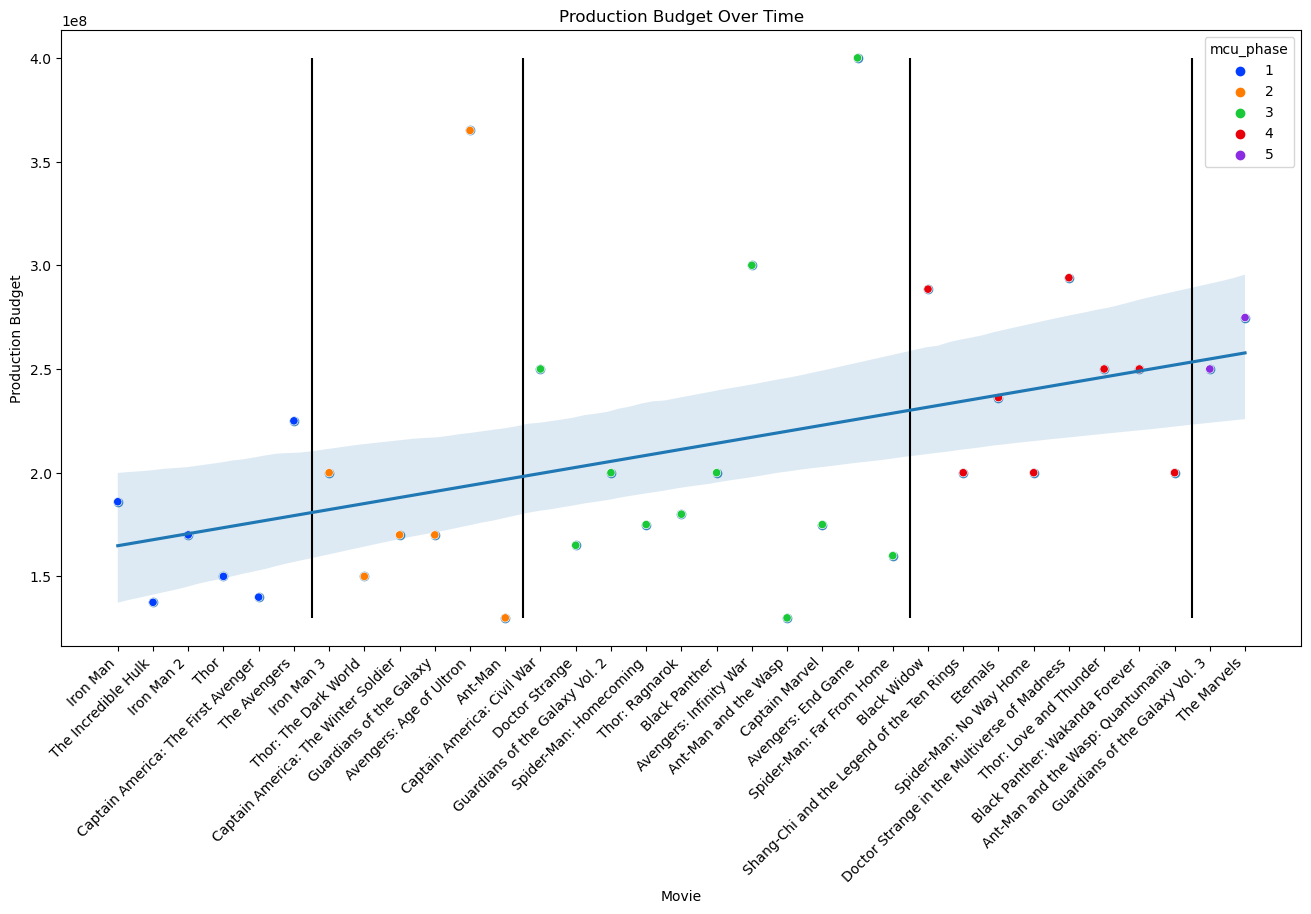

In [13]:
plt.figure(figsize=(16, 8))

plt.vlines(x=[5.5, 11.5, 22.5, 30.5], ymin=df['production_budget'].min(), ymax=df['production_budget'].max(), colors = 'black')
sns.regplot(x=df.index, y="production_budget", data=df)
sns.scatterplot(data=df, x="movie_title", y="production_budget", hue="mcu_phase", palette=sns.color_palette('bright')[:5])

plt.title('Production Budget Over Time')
plt.xlabel('Movie')
plt.ylabel('Production Budget')
plt.xticks(rotation=45, ha='right')

plt.show()

There is a clear upwards trajectory in the movie budget which was only sustained by a corresponding increase in the average box office numbers. What stands out prominently is the remarkable surge in average budgets in phases 4 and 5. As we previously mentioned, COVID caused the recent movies to go through plenty of financial challenges which also changed a lot of how Marvel wanted to plan their cinematic timeline making reshoots a necessity factoring into the budget increase. The "Profit Margin Percentage" visual indicates the struggle of gaining back the profit margins they had pre-COVID. With the rise of digital premieres and different release strategies, the traditional box office model has faced many challenges. Combined with the aforementioned dilution in quality and audience dissatisfaction, Marvel couldn't simply recoup their investments through the box office.

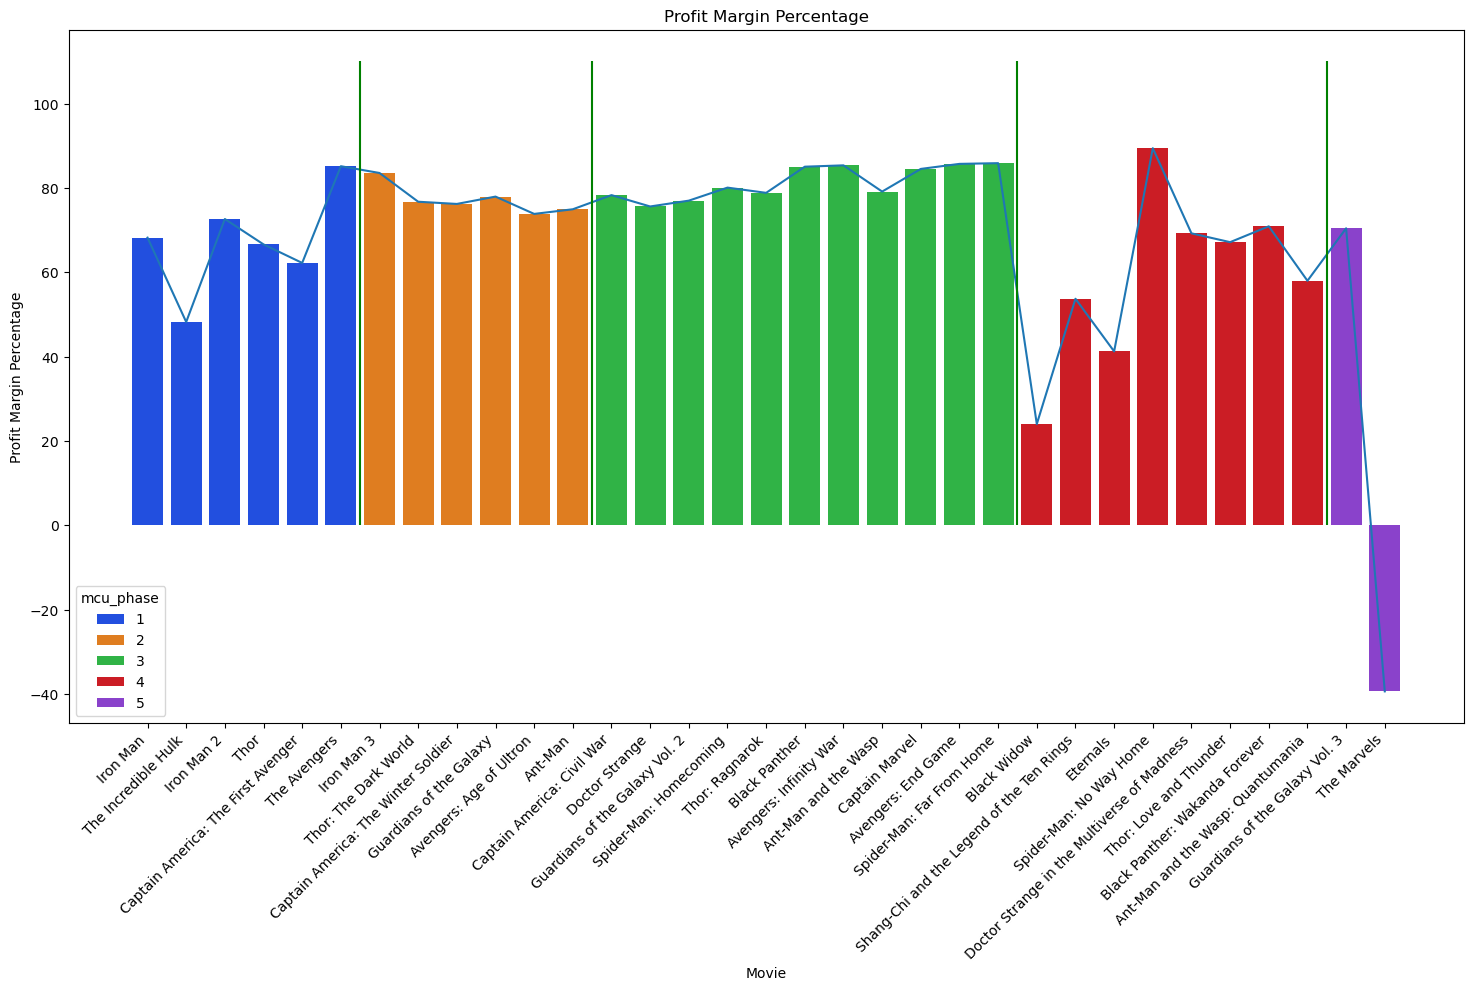

In [14]:
df["percent_profit_margin"] = ((df["worldwide_box_office"] - df["production_budget"])/df["worldwide_box_office"])*100
plt.figure(figsize=(18, 9))
plt.xticks(rotation=45, ha='right')
sns.lineplot(x=df.index, y="percent_profit_margin", data=df)
sns.barplot(data=df, x="movie_title", y="percent_profit_margin", hue="mcu_phase", palette=sns.color_palette('bright')[:5], dodge=False)
plt.vlines(x=(5.5, 11.5, 22.5, 30.5), ymin=0, ymax=110, colors = "green")


plt.title('Profit Margin Percentage')
plt.xlabel('Movie')
plt.ylabel('Profit Margin Percentage')
plt.show()

In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)

X = df['production_budget'].values.reshape(-1, 1)
y = df['worldwide_box_office']

model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_

print("Regression Coefficients:", coefficients)

Regression Coefficients: [4.74492408]


The regression coefficient for the production budget is 4.74, indicating that for every hundred million dollars increase in the production budget, the worldwide box office earnings is expected to increase by approximately 4.74 times that amount. For example, if a movie has a production budget of 150 million dollars, the model predicts an increase of approximately 4.74x150 million dollars in the worldwide box office earnings assuming all other factors remain constant. This coefficient serves as a quantitative measure of the impact of the production budget on the box office performance, with a higher budget associated with a higher expected box office return according to this linear regression analysis. Clearly, Marvel has not been able to achieve that level of coefficient for phase 4-5 so far.

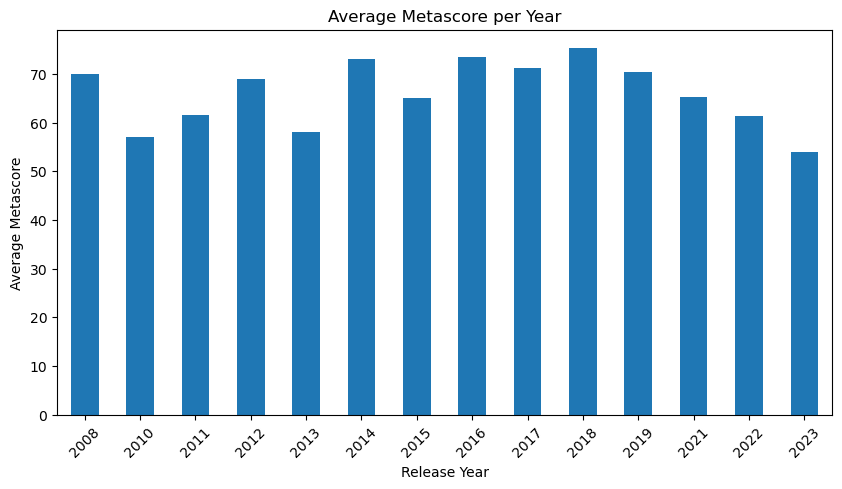

In [16]:
data_from_df = df[['release_date', 'audience_score', 'movie_title']]
data_from_df2 = df2[['release_date', 'audience_score', 'show_title']]

data_from_df = data_from_df.rename(columns={'movie_title': 'title'})
data_from_df2 = data_from_df2.rename(columns={'show_title': 'title'})

combined_data = pd.concat([data_from_df, data_from_df2])
combined_data['metascore'] = df['metascore']
combined_data['metascore_df2'] = df2['metascore']
combined_data = combined_data.dropna(subset=['release_date', 'audience_score', 'title', 'metascore'])
combined_data['Release_Year'] = pd.to_datetime(combined_data['release_date'], errors='coerce').dt.year
combined_data = combined_data[(combined_data['Release_Year'] >= 2008) & (combined_data['Release_Year'] <= 2023)]
avg_metascore_per_year = combined_data.groupby('Release_Year')['metascore'].mean()


plt.figure(figsize=(10, 5))
avg_metascore_per_year.plot(kind='bar')
plt.title('Average Metascore per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Metascore')
plt.xticks(rotation=45)
plt.show()

The trends in average metascores for Marvel content suggest a potential link between increased release frequency and declining critical reception. This decline over consecutive years implies diverse factors affecting critical acclaim. Firstly, the continual release schedule might have led to content saturation, possibly diluting quality or originality. Moreover, a higher volume of releases might compromise stringent quality control, affecting overall scores. Evolving audience and critic expectations might pose challenges in consistently meeting varied demands amidst increased content. Additionally, frequent releases might contribute to audience fatigue, reducing perceived quality as the novelty wears off. Further empirical studies are vital to ascertain this correlation, while analyzing additional aspects like creative decisions or directors could offer a holistic understanding of these trends.

# Conclusion

The comprehensive analysis of Marvel's movies and TV shows has unveiled intriguing trends and implications. Initially, examining the correlations within the dataset showcased noteworthy relationships between various factors. Delving deeper into the performance of Marvel movies and TV shows over the years revealed compelling patterns. Regression and correlation analysis were used to identify patterns within the dataset.

Positive correlations between critical acclaim and box office performance highlight the importance of quality in achieving commercial success. Negative correlations suggest complexities in balancing production budgets with critical acclaim. Trends indicate potential challenges with increased release frequency and evolving audience expectations. The impact of Disney+ series on storytelling coherence and concerns about the dilution of quality pose challenges for Marvel in maintaining the high standards set by earlier phases.

Furthermore, it's discernible that Marvel's extensive release schedule might lead to a saturated market with potentially diluted content quality. The intricate web of characters and storylines might pose challenges for both the audience and critics to track and engage with as the Marvel universe expands rapidly. This expansion might result in poorly developed characters and convoluted narratives, potentially impacting critical evaluations.

In conclusion, while Marvel's expansive universe continues to captivate audiences globally, the analysis reflects an evolving landscape where the sheer volume of releases might be impacting critical reception. Balancing quantity with quality remains a crucial consideration for sustaining Marvel's enduring legacy and ensuring continued audience engagement amidst the vast Marvel Cinematic Universe.